# Import packages

In [1]:
#Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Read files

In [2]:
#read files, join - MUST HAVE FILES IN LOCAL DIRECTORY
df = pd.read_csv("C:/RAHIM/MMA -QUEEN'S/Machine Learning & A.I. - MMA 869/Assignment/OJ.CSV")

In [3]:
#Number of NaN in the dataset
df.isnull().sum()
#No NA's in country dataset

Id                0
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

In [4]:
df.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


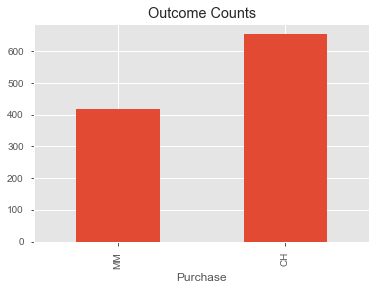

In [5]:
#check baseline for the juice purchase
df.groupby(df["Purchase"])['Id'].count().sort_values().plot(kind='bar')
plt.title("Outcome Counts")
plt.savefig("OutcomePurchase")
plt.show()

#which algorithms do best with this dataset? 
# Ratio is 61% CH and 39% MM

In [6]:
sns.set(style="ticks", color_codes=True)

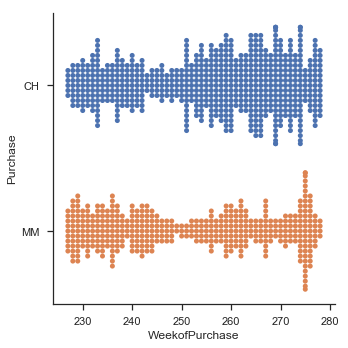

In [7]:
sns.catplot(x="WeekofPurchase", y="Purchase", kind="swarm", data=df);

In [8]:
#correlation matrix
df.profile_report()

In [9]:
#Drop store 7
df = df.drop(columns=['Store7'])

In [10]:
df = df.drop(columns=['STORE'])

In [11]:
df.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00


In [12]:
#Change CH to 1 and MM to 1
df["Purchase"][df["Purchase"] == "CH"] = 1
df["Purchase"][df["Purchase"] == "MM"] = 0

In [13]:
df.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff
0,1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24
1,2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24
2,3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23
3,4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00
4,5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00


In [14]:
#One-hot-encoding features

ohe_feats = ['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'SalePriceMM', 'SalePriceCH']
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(df[f], prefix=f)
    df = df.drop([f], axis=1)
    df = pd.concat((df, df_all_dummy), axis=1)

In [15]:
df.head()

,Id,Purchase,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,...,SalePriceCH_1.69,SalePriceCH_1.75,SalePriceCH_1.76,SalePriceCH_1.79,SalePriceCH_1.86,SalePriceCH_1.89,SalePriceCH_1.96,SalePriceCH_1.99,SalePriceCH_2.06,SalePriceCH_2.09
0,1,1,0.0,0,0,0.500000,0.24,0.000000,0.000000,0.24,...,0,1,0,0,0,0,0,0,0,0
1,2,1,0.3,0,1,0.600000,-0.06,0.150754,0.000000,0.24,...,0,1,0,0,0,0,0,0,0,0
2,3,1,0.0,0,0,0.680000,0.40,0.000000,0.091398,0.23,...,1,0,0,0,0,0,0,0,0,0
3,4,0,0.0,0,0,0.400000,0.00,0.000000,0.000000,0.00,...,1,0,0,0,0,0,0,0,0,0
4,5,1,0.0,0,0,0.956535,0.00,0.000000,0.000000,0.00,...,1,0,0,0,0,0,0,0,0,0


In [16]:
#Converting Int to Float.
df['Purchase'] = df['Purchase'].astype('float')

# Split Data 

In [17]:
#train test split dataset to measure performance. Original test_users dataset provided by airbnb does not come with labels
# so we need to create our own test set
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,2:128],df['Purchase'],test_size=0.25,random_state=1)

In [18]:
x_train.head()

,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,WeekofPurchase_227,WeekofPurchase_228,...,SalePriceCH_1.69,SalePriceCH_1.75,SalePriceCH_1.76,SalePriceCH_1.79,SalePriceCH_1.86,SalePriceCH_1.89,SalePriceCH_1.96,SalePriceCH_1.99,SalePriceCH_2.06,SalePriceCH_2.09
50,0.00,0,0,0.927675,0.24,0.000000,0.0,0.24,0,0,...,0,0,0,0,0,0,0,1,0,0
659,0.06,0,0,0.788394,0.26,0.027523,0.0,0.32,0,0,...,0,0,0,0,1,0,0,0,0,0
952,0.40,0,1,0.003817,-0.08,0.183486,0.0,0.32,0,0,...,0,0,0,0,1,0,0,0,0,0
1038,0.00,0,0,0.400000,0.30,0.000000,0.0,0.30,0,0,...,1,0,0,0,0,0,0,0,0,0
386,0.00,0,0,0.165373,0.00,0.000000,0.0,0.00,0,0,...,1,0,0,0,0,0,0,0,0,0


# Model building and Accuracy

# Hyperparameter Tuning for later use

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


# Random Forest

In [21]:
from sklearn.metrics import confusion_matrix
#Random forest classification - instantiate classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

#predict and store predictions in a series 
rfc_predict = clf.predict(x_test)
from pandas_ml import ConfusionMatrix
print(ConfusionMatrix(y_test, rfc_predict))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, rfc_predict)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, rfc_predict)))
print("F1 Score = {:.2f}".format(f1_score(y_test, rfc_predict)))
print("Log Loss = {:.2f}".format(log_loss(y_test, rfc_predict)))
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_predict))
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_auc_score(y_test, rfc_predict))

Predicted  False  True  __all__
Actual                         
False          5     8       13
True          17    49       66
__all__       22    57       79
Accuracy = 0.76
Kappa = 0.50
F1 Score = 0.80
Log Loss = 8.25
             precision    recall  f1-score   support

        0.0       0.75      0.64      0.69       112
        1.0       0.77      0.85      0.80       156

avg / total       0.76      0.76      0.76       268

0.7445054945054945


# Naive Bayes

In [22]:
#import NB package
from sklearn.naive_bayes import BernoulliNB

#Generate predictions using Naive Bayes
clf = BernoulliNB()
clf.fit(x_train,y_train)
y_preds_NB = clf.predict(x_test)

#predict and store predictions in a series 
NB_predict = clf.predict(x_test)


print(ConfusionMatrix(y_test, NB_predict))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, NB_predict)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, NB_predict)))
print("F1 Score = {:.2f}".format(f1_score(y_test, NB_predict)))
print("Log Loss = {:.2f}".format(log_loss(y_test, NB_predict)))
print(classification_report(y_test, NB_predict))
print(roc_auc_score(y_test, NB_predict))

Predicted  False  True  __all__
Actual                         
False          9     4       13
True          30    36       66
__all__       39    40       79
Accuracy = 0.64
Kappa = 0.29
F1 Score = 0.66
Log Loss = 12.37
             precision    recall  f1-score   support

        0.0       0.56      0.70      0.62       112
        1.0       0.73      0.60      0.66       156

avg / total       0.66      0.64      0.64       268

0.649496336996337


# Neural Network

In [58]:
#import NN package

from sklearn.neural_network import MLPClassifier

#Generate prediction using Neural Net
clf = MLPClassifier()
clf.fit(x_train,y_train)
y_preds_NN = clf.predict(x_test)

print(ConfusionMatrix(y_test, y_preds_NN))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NN)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NN)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NN)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NN)))
print(classification_report(y_test, y_preds_NN))
print(roc_auc_score(y_test, y_preds_NN))

Predicted  False  True  __all__
Actual                         
False          7     6       13
True          22    44       66
__all__       29    50       79
Accuracy = 0.77
Kappa = 0.52
F1 Score = 0.80
Log Loss = 7.99
             precision    recall  f1-score   support

        0.0       0.73      0.71      0.72       112
        1.0       0.79      0.81      0.80       156

avg / total       0.77      0.77      0.77       268

0.7597298534798534


# XGBoost

In [24]:
#import XGBoost package
from xgboost.sklearn import XGBClassifier

#Classifier
xgb = XGBClassifier(seed=0)                  
xgb.fit(x_train, y_train)
y_preds_XGB = xgb.predict(x_test) 

print(ConfusionMatrix(y_test, y_preds_XGB))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_XGB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_XGB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_XGB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_XGB)))
print(classification_report(y_test, y_preds_XGB))
print(roc_auc_score(y_test, y_preds_XGB))

Predicted  False  True  __all__
Actual                         
False          6     7       13
True          19    47       66
__all__       25    54       79
Accuracy = 0.85
Kappa = 0.69
F1 Score = 0.88
Log Loss = 5.16
             precision    recall  f1-score   support

        0.0       0.86      0.77      0.81       112
        1.0       0.85      0.91      0.88       156

avg / total       0.85      0.85      0.85       268

0.8390567765567764


# AdaBoost

In [25]:
#import AdaBoostClassifier package
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier(random_state=1)
AdaB.fit(x_train, y_train)
y_preds_AdaB = AdaB.predict(x_test) 

print(ConfusionMatrix(y_test, y_preds_AdaB))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_AdaB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_AdaB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_AdaB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_AdaB)))
print(classification_report(y_test, y_preds_AdaB))
print(roc_auc_score(y_test, y_preds_AdaB))

Predicted  False  True  __all__
Actual                         
False          7     6       13
True          15    51       66
__all__       22    57       79
Accuracy = 0.79
Kappa = 0.55
F1 Score = 0.83
Log Loss = 7.35
             precision    recall  f1-score   support

        0.0       0.80      0.66      0.72       112
        1.0       0.78      0.88      0.83       156

avg / total       0.79      0.79      0.78       268

0.7694597069597069


# Gradient Boosting (GBM)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(learning_rate=0.01,random_state=1)

GBM.fit(x_train, y_train)
y_preds_GBM = GBM.predict(x_test) 

print(ConfusionMatrix(y_test, y_preds_GBM))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_GBM)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_GBM)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_GBM)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_GBM)))
print(classification_report(y_test, y_preds_GBM))
print(roc_auc_score(y_test, y_preds_GBM))

Predicted  False  True  __all__
Actual                         
False          6     7       13
True          20    46       66
__all__       26    53       79
Accuracy = 0.82
Kappa = 0.63
F1 Score = 0.86
Log Loss = 6.06
             precision    recall  f1-score   support

        0.0       0.83      0.73      0.78       112
        1.0       0.82      0.89      0.86       156

avg / total       0.82      0.82      0.82       268

0.8115842490842491


# Decision Tree

In [27]:
#import DecisionTreeClassifier package
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_preds_dtc = dtc.predict(x_test) 

print(ConfusionMatrix(y_test, y_preds_dtc))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_dtc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_dtc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_dtc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_dtc)))
print(classification_report(y_test, y_preds_dtc))
print(roc_auc_score(y_test, y_preds_dtc))

Predicted  False  True  __all__
Actual                         
False          8     5       13
True          20    46       66
__all__       28    51       79
Accuracy = 0.78
Kappa = 0.54
F1 Score = 0.82
Log Loss = 7.60
             precision    recall  f1-score   support

        0.0       0.76      0.70      0.73       112
        1.0       0.79      0.84      0.82       156

avg / total       0.78      0.78      0.78       268

0.7680860805860805


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_preds_knn = knn_clf.predict(x_test)


print(ConfusionMatrix(y_test, y_preds_knn))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_knn)))
print(classification_report(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_knn))

Predicted  False  True  __all__
Actual                         
False          6     7       13
True          21    45       66
__all__       27    52       79
Accuracy = 0.71
Kappa = 0.38
F1 Score = 0.76
Log Loss = 10.18
             precision    recall  f1-score   support

        0.0       0.68      0.56      0.61       112
        1.0       0.72      0.81      0.76       156

avg / total       0.70      0.71      0.70       268

0.6850961538461539


# SVC - Linear

In [29]:
from sklearn.svm import SVC

#SVM
svm_clf = SVC(kernel="linear", C=0.09)
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)

print(ConfusionMatrix(y_test, y_pred_svm))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))
print(classification_report(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

Predicted  False  True  __all__
Actual                         
False          5     8       13
True          16    50       66
__all__       21    58       79
Accuracy = 0.83
Kappa = 0.64
F1 Score = 0.86
Log Loss = 5.93
             precision    recall  f1-score   support

        0.0       0.88      0.69      0.77       112
        1.0       0.81      0.93      0.86       156

avg / total       0.83      0.83      0.82       268

0.8084935897435898


# Feature Selection

In [30]:
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier

# Helper function
def evaluate_with_dt(X_train, X_test, y_train, y_test):
    clf_full = DecisionTreeClassifier(random_state=0)
    clf_full.fit(X_train, y_train)
    y_pred_dt = clf_full.predict(X_test)
    print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
    print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
    print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
    print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))
    print(classification_report(y_test, y_pred_dt))
    print(roc_auc_score(y_test, y_pred_dt))

In [31]:
evaluate_with_dt(x_train, x_test, y_train, y_test)

Accuracy = 0.78
Kappa = 0.54
F1 Score = 0.82
Log Loss = 7.60
             precision    recall  f1-score   support

        0.0       0.76      0.70      0.73       112
        1.0       0.79      0.84      0.82       156

avg / total       0.78      0.78      0.78       268

0.7680860805860805


#    # Variance Threshold (Filter Method, Unsupervised)

In [32]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel.fit(x_train);

In [33]:
sel.variances_
sel.get_support()
sum(sel.get_support())

20

In [34]:
x_train_new = x_train.loc[:, sel.get_support()]
x_test_new = x_test.loc[:, sel.get_support()]

evaluate_with_dt(x_train_new, x_test_new, y_train, y_test)

Accuracy = 0.74
Kappa = 0.46
F1 Score = 0.78
Log Loss = 9.02
             precision    recall  f1-score   support

        0.0       0.69      0.68      0.68       112
        1.0       0.77      0.78      0.78       156

avg / total       0.74      0.74      0.74       268

0.7303113553113553


# Univariate Feature Selection (Filter Method, Supervised)

In [51]:
#Drop store 7
X_train = x_train.drop(columns=['PriceDiff'])
Y_train = y_train.drop(columns=['PriceDiff'])

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel.fit(X_train, Y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x000001CC0168ABF8>)

In [53]:
sel.pvalues_
sel.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [54]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = x_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, Y_train, y_test)

Accuracy = 0.68
Kappa = 0.33
F1 Score = 0.72
Log Loss = 11.21
             precision    recall  f1-score   support

        0.0       0.61      0.61      0.61       112
        1.0       0.72      0.72      0.72       156

avg / total       0.67      0.68      0.68       268

0.6657509157509158


# Recursive Feature Elimination (Wrapper Method)

In [39]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier(random_state=0)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(x_train, y_train)

Wall time: 16.2 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [40]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
x_train.columns[rfecv.get_support()]

Optimal number of features : 110


Index(['SpecialCH', 'SpecialMM', 'LoyalCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'WeekofPurchase_227',
       'WeekofPurchase_228', 'WeekofPurchase_229',
       ...
       'SalePriceMM_2.23', 'SalePriceCH_1.39', 'SalePriceCH_1.49',
       'SalePriceCH_1.59', 'SalePriceCH_1.69', 'SalePriceCH_1.75',
       'SalePriceCH_1.76', 'SalePriceCH_1.79', 'SalePriceCH_1.86',
       'SalePriceCH_1.89'],
      dtype='object', length=110)

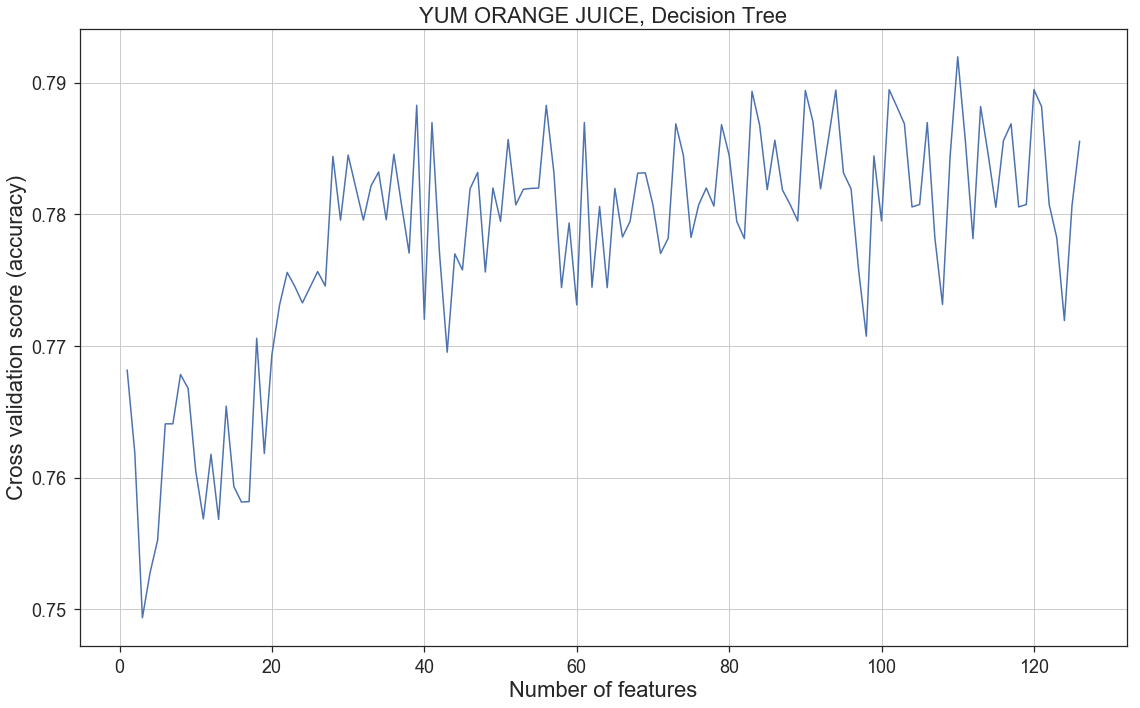

In [41]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('YUM ORANGE JUICE, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
plt.savefig('AirSimClient.write_file-py1.png');

# Hyperparameter Tuning

In [42]:
def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_fit_time'] = cv_results['mean_fit_time']
    results['mean_score_time'] = cv_results['mean_score_time']
    results['mean_train_score'] = cv_results['mean_train_score']
    results['std_train_score'] = cv_results['std_train_score']
    results['mean_test_score'] = cv_results['mean_test_score']
    results['std_test_score'] = cv_results['std_test_score']
    results['rank_test_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_test_score'], ascending=False)
    return results

In [43]:
from sklearn.model_selection import GridSearchCV

hyperparams = {'criterion':('gini', 'entropy'), 
               'max_depth':[1, 5, 10, 50],
               'max_leaf_nodes': [5, 20, 100]}
clf = DecisionTreeClassifier(min_samples_split=2)
gridsearch = GridSearchCV(clf, hyperparams, cv=5, return_train_score=True)
%time gridsearch.fit(x_train, y_train)

Wall time: 789 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 5, 10, 50], 'max_leaf_nodes': [5, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
results = cv_results_to_df(gridsearch.cv_results_)
results

,criterion,max_depth,max_leaf_nodes,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
5,gini,5,100,0.004406,0.000600,0.897447,0.013613,0.815461,0.020145,1
10,gini,50,20,0.004199,0.000200,0.880303,0.013379,0.815461,0.026847,1
7,gini,10,20,0.004003,0.000200,0.880303,0.013379,0.812968,0.024849,3
4,gini,5,20,0.004603,0.000801,0.878432,0.011460,0.811721,0.024988,4
17,entropy,5,100,0.004806,0.000400,0.882790,0.010712,0.805486,0.025849,5
3,gini,5,5,0.003002,0.000600,0.832608,0.004278,0.799252,0.022017,6
6,gini,10,5,0.003199,0.000801,0.832608,0.004278,0.799252,0.022017,6
9,gini,50,5,0.002802,0.000604,0.832608,0.004278,0.799252,0.022017,6
0,gini,1,5,0.004203,0.000800,0.817646,0.009192,0.798005,0.023216,9
2,gini,1,100,0.002606,0.000600,0.817646,0.009192,0.798005,0.023216,9


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

hyperparam_dist = {"max_depth": sp_randint(1, 100),
              "max_features": sp_randint(1, 125),
              "min_samples_split": sp_randint(2, 125),
              "criterion": ["gini", "entropy"]}

clf = DecisionTreeClassifier(min_samples_split=2)
randomsearch = RandomizedSearchCV(clf, param_distributions=hyperparam_dist, 
                                  cv=5, return_train_score=True, n_iter=100, iid='warn');
%time randomsearch.fit(x_train, y_train);

Wall time: 4.79 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC0012F978>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC0012F898>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC001182E8>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [46]:
cv_results_to_df(randomsearch.cv_results_)

,criterion,max_depth,max_features,min_samples_split,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
18,entropy,57,32,74,0.003802,0.001001,0.834782,0.019853,0.814214,0.018920,1
85,entropy,58,108,66,0.005404,0.000597,0.852247,0.008521,0.806733,0.040310,2
12,entropy,52,82,63,0.005604,0.000600,0.858483,0.008204,0.805486,0.014804,3
40,entropy,55,75,38,0.007405,0.000801,0.874384,0.016340,0.805486,0.014993,3
52,gini,51,117,71,0.010207,0.001201,0.861908,0.014292,0.804239,0.038307,5
9,entropy,8,55,22,0.007806,0.000801,0.869692,0.021206,0.802993,0.028182,6
48,entropy,5,89,88,0.007205,0.001601,0.837285,0.006722,0.802993,0.038150,6
47,entropy,29,120,67,0.011008,0.001401,0.854429,0.008928,0.799252,0.024175,8
45,gini,34,112,48,0.008005,0.000801,0.876874,0.006010,0.799252,0.027940,8
82,gini,16,106,10,0.008605,0.000400,0.925810,0.003229,0.799252,0.029718,8


# Decision tree with tuning

In [47]:
#import DecisionTreeClassifier package
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth = 7, criterion = 'gini', max_features = 59, min_samples_split = 49)
dtc.fit(x_train, y_train)
y_preds_dtc = dtc.predict(x_test) 

print(ConfusionMatrix(y_test, y_preds_dtc))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_dtc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_dtc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_dtc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_dtc)))
print(classification_report(y_test, y_preds_dtc))
print(roc_auc_score(y_test, y_preds_dtc))

Predicted  False  True  __all__
Actual                         
False          6     7       13
True          24    42       66
__all__       30    49       79
Accuracy = 0.81
Kappa = 0.61
F1 Score = 0.84
Log Loss = 6.44
             precision    recall  f1-score   support

        0.0       0.79      0.75      0.77       112
        1.0       0.83      0.86      0.84       156

avg / total       0.81      0.81      0.81       268

0.8044871794871794


Perfomance inproved after tuning. 

# XGBoost is performing well so we will try to improve our model by parameter tuning

In [48]:
train = df
target = 'Purchase'
IDcol = 'Id'

In [49]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g") % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print ("AUC Score (Train): %f") % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [50]:
#Choose all predictors except target & IDcols
import xgboost as xgb
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

TypeError: cv() got an unexpected keyword argument 'show_progress'

# Couldn’t fix this error. 